
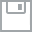
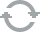
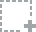
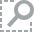
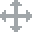
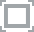
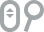
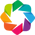
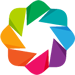
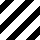
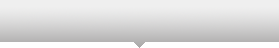
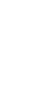
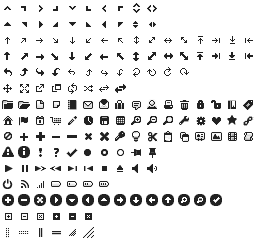
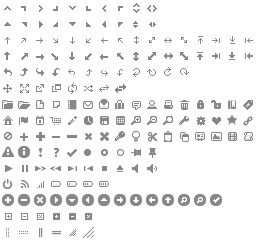
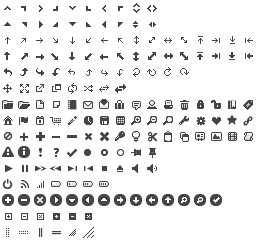
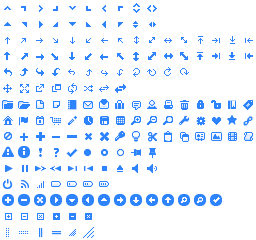
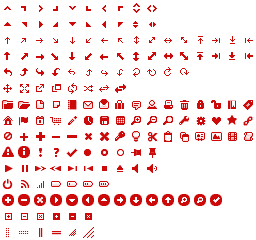
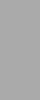

In [2]:
# -*- coding: utf-8 -*-
from bokeh.sampledata.iris import flowers
from bokeh.plotting import figure, show, output_notebook
from bokeh.embed import notebook_div
from collections import OrderedDict
import numpy as np
import time
from IPython.display import Image, HTML
import os
import urllib2

from bokeh.plotting import *
from bokeh.models import HoverTool
output_notebook()

In [3]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
flowers['color'] = flowers['species'].map(lambda x: colormap[x])

# output_file("iris.html", title="iris.py example")

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
        color=flowers["color"], fill_alpha=0.2, size=10, )

show(p)

In [4]:
import pandas as pd
import nltk
import Levenshtein

In [5]:
f = open('rj.txt', 'r')
lines = f.readlines()
f.close()
print "".join(lines[0:10])
print 'https://www.gutenberg.org/ebooks/1112'

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet


https://www.gutenberg.org/ebooks/1112


In [6]:
#remove foot and end notes
lines = lines[61:4486]

In [7]:
import re

raw_text = ''
for l in lines:
    raw_text += l

text = re.sub(r'\s+', ' ', raw_text) 
print text[0:100]

 1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus. Escalus, Prin


In [8]:
sents = nltk.sent_tokenize(text)
print sents[0:10]

[' 1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus.', 'Escalus, Prince of Verona.', 'Paris, a young Count, kinsman to the Prince.', 'Montague, heads of two houses at variance with each other.', 'Capulet, heads of two houses at variance with each other.', 'An old Man, of the Capulet family.', 'Romeo, son to Montague.', 'Tybalt, nephew to Lady Capulet.', 'Mercutio, kinsman to the Prince and friend to Romeo.', 'Benvolio, nephew to Montague, and friend to Romeo Tybalt, nephew to Lady Capulet.']


In [9]:
raw_words = []
for s in sents:
    for w in nltk.word_tokenize(s):
        raw_words.append(w)

In [10]:
print len(raw_words), raw_words[0:50]

33031 ['1595', 'THE', 'TRAGEDY', 'OF', 'ROMEO', 'AND', 'JULIET', 'by', 'William', 'Shakespeare', 'Dramatis', 'Personae', 'Chorus', '.', 'Escalus', ',', 'Prince', 'of', 'Verona', '.', 'Paris', ',', 'a', 'young', 'Count', ',', 'kinsman', 'to', 'the', 'Prince', '.', 'Montague', ',', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', '.', 'Capulet', ',', 'heads', 'of', 'two', 'houses', 'at']


In [11]:
words0 = [w.lower() for w in raw_words]
print words0[0:100]

['1595', 'the', 'tragedy', 'of', 'romeo', 'and', 'juliet', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', '.', 'escalus', ',', 'prince', 'of', 'verona', '.', 'paris', ',', 'a', 'young', 'count', ',', 'kinsman', 'to', 'the', 'prince', '.', 'montague', ',', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', '.', 'capulet', ',', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', '.', 'an', 'old', 'man', ',', 'of', 'the', 'capulet', 'family', '.', 'romeo', ',', 'son', 'to', 'montague', '.', 'tybalt', ',', 'nephew', 'to', 'lady', 'capulet', '.', 'mercutio', ',', 'kinsman', 'to', 'the', 'prince', 'and', 'friend', 'to', 'romeo', '.', 'benvolio', ',', 'nephew', 'to', 'montague', ',', 'and', 'friend', 'to', 'romeo', 'tybalt', ',']


In [12]:
def is_punct(w):
    return re.match(r'^\W+$', w) != None
words = [w for w in words0 if not is_punct(w)]
print words[0:100]

['1595', 'the', 'tragedy', 'of', 'romeo', 'and', 'juliet', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'prince', 'of', 'verona', 'paris', 'a', 'young', 'count', 'kinsman', 'to', 'the', 'prince', 'montague', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'capulet', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'an', 'old', 'man', 'of', 'the', 'capulet', 'family', 'romeo', 'son', 'to', 'montague', 'tybalt', 'nephew', 'to', 'lady', 'capulet', 'mercutio', 'kinsman', 'to', 'the', 'prince', 'and', 'friend', 'to', 'romeo', 'benvolio', 'nephew', 'to', 'montague', 'and', 'friend', 'to', 'romeo', 'tybalt', 'nephew', 'to', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'to', 'romeo', 'abram', 'servant', 'to', 'montague', 'sampson', 'servant', 'to']


In [13]:
def is_shortening(w):
    return w.startswith('\'')
words = [w for w in words if not is_shortening(w)]
print words[0:100]

['1595', 'the', 'tragedy', 'of', 'romeo', 'and', 'juliet', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'prince', 'of', 'verona', 'paris', 'a', 'young', 'count', 'kinsman', 'to', 'the', 'prince', 'montague', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'capulet', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'an', 'old', 'man', 'of', 'the', 'capulet', 'family', 'romeo', 'son', 'to', 'montague', 'tybalt', 'nephew', 'to', 'lady', 'capulet', 'mercutio', 'kinsman', 'to', 'the', 'prince', 'and', 'friend', 'to', 'romeo', 'benvolio', 'nephew', 'to', 'montague', 'and', 'friend', 'to', 'romeo', 'tybalt', 'nephew', 'to', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'to', 'romeo', 'abram', 'servant', 'to', 'montague', 'sampson', 'servant', 'to']


In [14]:
def histogram(words):
    freq = {}
    for w in words:
        if freq.has_key(w):
            freq[w] = freq[w] + 1
        else:
            freq[w] = 1
    return freq

freq = histogram(words)

In [15]:
print freq['romeo'], freq['to'], freq['at']

152 540 70


In [16]:
lfreq = [(freq[l], l) for l in freq.keys()]
lfreq.sort()
print lfreq[-10:-1]

[(319, 'in'), (355, 'that'), (359, 'my'), (385, 'is'), (401, 'of'), (461, 'a'), (540, 'to'), (644, 'i'), (677, 'the')]


In [17]:
print len(lfreq), lfreq[-1::-1][0:10]
f_lfreq = [1.*l[0]/lfreq[-1][0] for l in lfreq[-1::-1]]

3726 [(712, 'and'), (677, 'the'), (644, 'i'), (540, 'to'), (461, 'a'), (401, 'of'), (385, 'is'), (359, 'my'), (355, 'that'), (319, 'in')]


In [18]:
p = figure(title='Romeo and Juliet Words Count (in Log Scale)')
p.circle(np.log(range(len(lfreq))), np.log(f_lfreq))
xx = range(1, 100)
p.line(np.log(xx), np.log([1./l for l in xx]))
show(p)

In [19]:
from bokeh.models import Range1d
from bokeh.models import HoverTool 

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"

x = range(100)
p = figure(title='Romeo and Juliet Words Count', tools=TOOLS)
source = ColumnDataSource(
    data=dict(
        x=x,
        label=["%s" % (lfreq[(-1-int(x_))][1]) for x_ in range(len(x))]
    )
)
p.circle(range(1, len(lfreq)+1)[0:100], f_lfreq[0:100], source = source)
hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(xx,yy)", "(@x, @y)"),
    ("label", "@label"),
])

# p.line(xx[0:100], [1./l for l in xx][0:100])
# p.line(xx[0:100], [1./np.power(l, 0.5) for l in xx][0:100], color='red')

left, right, bottom, top = 0, 50, 0, 1.1
p.set(x_range=Range1d(left, right), y_range=Range1d(bottom, top))

show(p)

In [20]:
from scipy.optimize import curve_fit

def zipf(n, s):
    return 1./np.power(n, s)

N = 100
xx = range(1, N+1)

curve_fit(zipf, xx, f_lfreq[0:100])

(array([ 0.4705261]), array([[ 0.0001237]]))

In [21]:
p = figure(title='Romeo and Juliet Words Count', tools=TOOLS)
p.circle(range(1, len(lfreq)+1)[0:100], f_lfreq[0:100], source = source)
p.line(xx[0:100], [zipf(l, 0.46) for l in xx][0:100], color='red')
show(p)

In [22]:
def zipf2(n, d, s1, s2, bound):
    res = np.zeros(len(n))
    for i in range(len(n)):
        n1 = n[i]
        if n1 > bound:
            res[i] = d/np.power(n1, s2)
        else:
            res[i] = d/np.power(n1, s1)
    return res

N = 100
xxx = range(1, N+1)

curve_fit(zipf2, xxx, f_lfreq[0:N])

C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.30263592,  1.        ,  0.5502596 ,  1.        ]),
 array([[ inf,  inf,  inf,  inf],
        [ inf,  inf,  inf,  inf],
        [ inf,  inf,  inf,  inf],
        [ inf,  inf,  inf,  inf]]))

In [23]:
p = figure(title='Romeo and Juliet Words Count')
p.circle(range(1, len(lfreq)+1)[0:100], f_lfreq[0:100], source = source)
p.line(xx[0:100], zipf2(xx, 1.3, 1., 0.53, 1.)[0:100], color='red')
show(p)

In [24]:
# Now 'R&J' from First Folio from Gutenberg: https://www.gutenberg.org/ebooks/2270
f = open('firstfolio_rj.txt', 'r')
lines = f.readlines()
f.close()
print lines[0:10]

['The Tragedie of Romeo and Juliet\n', '\n', 'Actus Primus. Scoena Prima.\n', '\n', 'Enter Sampson and Gregory, with Swords and Bucklers, of the\n', 'House of\n', 'Capulet.\n', '\n', "  Sampson. Gregory: A my word wee'l not carry coales\n", '\n']


In [25]:
raw_text = ''
for l in lines:
    raw_text += l

text = re.sub(r'\s+', ' ', raw_text) 
print text[0:100]

The Tragedie of Romeo and Juliet Actus Primus. Scoena Prima. Enter Sampson and Gregory, with Swords 


In [26]:
sents = nltk.sent_tokenize(text)
print sents[0:10]

['The Tragedie of Romeo and Juliet Actus Primus.', 'Scoena Prima.', 'Enter Sampson and Gregory, with Swords and Bucklers, of the House of Capulet.', 'Sampson.', "Gregory: A my word wee'l not carry coales Greg.", 'No, for then we should be Colliars Samp.', "I mean, if we be in choller, wee'l draw Greg.", "I, While you liue, draw your necke out o'th Collar Samp.", "I strike quickly, being mou'd Greg.", "But thou art not quickly mou'd to strike Samp."]


In [27]:
raw_words = []
for s in sents:
    for w in nltk.word_tokenize(s):
        raw_words.append(w)
print len(raw_words), raw_words[0:50]

30659 ['The', 'Tragedie', 'of', 'Romeo', 'and', 'Juliet', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Sampson', 'and', 'Gregory', ',', 'with', 'Swords', 'and', 'Bucklers', ',', 'of', 'the', 'House', 'of', 'Capulet', '.', 'Sampson', '.', 'Gregory', ':', 'A', 'my', 'word', "wee'l", 'not', 'carry', 'coales', 'Greg', '.', 'No', ',', 'for', 'then', 'we', 'should', 'be', 'Colliars', 'Samp']


In [28]:
words0 = [w.lower() for w in raw_words]
print words0[0:100]

['the', 'tragedie', 'of', 'romeo', 'and', 'juliet', 'actus', 'primus', '.', 'scoena', 'prima', '.', 'enter', 'sampson', 'and', 'gregory', ',', 'with', 'swords', 'and', 'bucklers', ',', 'of', 'the', 'house', 'of', 'capulet', '.', 'sampson', '.', 'gregory', ':', 'a', 'my', 'word', "wee'l", 'not', 'carry', 'coales', 'greg', '.', 'no', ',', 'for', 'then', 'we', 'should', 'be', 'colliars', 'samp', '.', 'i', 'mean', ',', 'if', 'we', 'be', 'in', 'choller', ',', "wee'l", 'draw', 'greg', '.', 'i', ',', 'while', 'you', 'liue', ',', 'draw', 'your', 'necke', 'out', "o'th", 'collar', 'samp', '.', 'i', 'strike', 'quickly', ',', 'being', 'mou', "'d", 'greg', '.', 'but', 'thou', 'art', 'not', 'quickly', 'mou', "'d", 'to', 'strike', 'samp', '.', 'a', 'dog']


In [29]:
words = [w for w in words0 if not is_punct(w)]
print words[0:100]

['the', 'tragedie', 'of', 'romeo', 'and', 'juliet', 'actus', 'primus', 'scoena', 'prima', 'enter', 'sampson', 'and', 'gregory', 'with', 'swords', 'and', 'bucklers', 'of', 'the', 'house', 'of', 'capulet', 'sampson', 'gregory', 'a', 'my', 'word', "wee'l", 'not', 'carry', 'coales', 'greg', 'no', 'for', 'then', 'we', 'should', 'be', 'colliars', 'samp', 'i', 'mean', 'if', 'we', 'be', 'in', 'choller', "wee'l", 'draw', 'greg', 'i', 'while', 'you', 'liue', 'draw', 'your', 'necke', 'out', "o'th", 'collar', 'samp', 'i', 'strike', 'quickly', 'being', 'mou', "'d", 'greg', 'but', 'thou', 'art', 'not', 'quickly', 'mou', "'d", 'to', 'strike', 'samp', 'a', 'dog', 'of', 'the', 'house', 'of', 'mountague', 'moues', 'me', 'greg', 'to', 'moue', 'is', 'to', 'stir', 'and', 'to', 'be', 'valiant', 'is', 'to']


In [30]:
words = [w for w in words if not is_shortening(w)]
print words[0:100]

['the', 'tragedie', 'of', 'romeo', 'and', 'juliet', 'actus', 'primus', 'scoena', 'prima', 'enter', 'sampson', 'and', 'gregory', 'with', 'swords', 'and', 'bucklers', 'of', 'the', 'house', 'of', 'capulet', 'sampson', 'gregory', 'a', 'my', 'word', "wee'l", 'not', 'carry', 'coales', 'greg', 'no', 'for', 'then', 'we', 'should', 'be', 'colliars', 'samp', 'i', 'mean', 'if', 'we', 'be', 'in', 'choller', "wee'l", 'draw', 'greg', 'i', 'while', 'you', 'liue', 'draw', 'your', 'necke', 'out', "o'th", 'collar', 'samp', 'i', 'strike', 'quickly', 'being', 'mou', 'greg', 'but', 'thou', 'art', 'not', 'quickly', 'mou', 'to', 'strike', 'samp', 'a', 'dog', 'of', 'the', 'house', 'of', 'mountague', 'moues', 'me', 'greg', 'to', 'moue', 'is', 'to', 'stir', 'and', 'to', 'be', 'valiant', 'is', 'to', 'stand', 'therefore']


In [31]:
def histogram(words):
    freq = {}
    for w in words:
        if freq.has_key(w):
            freq[w] = freq[w] + 1
        else:
            freq[w] = 1
    return freq

freq = histogram(words)

In [32]:
print freq['romeo'], freq['to'], freq['at']

146 548 64


In [33]:
lfreq2 = [(freq[l], l) for l in freq.keys()]
lfreq2.sort()
print lfreq2[-10:-1]

[(316, 'in'), (352, 'that'), (374, 'my'), (381, 'is'), (382, 'of'), (471, 'a'), (548, 'to'), (597, 'i'), (660, 'the')]


In [34]:
print len(lfreq2), lfreq2[-1::-1][0:10]
f_lfreq2 = [1.*l[0]/lfreq2[-1][0] for l in lfreq2[-1::-1]]

3923 [(692, 'and'), (660, 'the'), (597, 'i'), (548, 'to'), (471, 'a'), (382, 'of'), (381, 'is'), (374, 'my'), (352, 'that'), (316, 'in')]


#Plot data together

In [35]:
from bokeh.models import Range1d
from bokeh.models import HoverTool 

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"

source1 = ColumnDataSource(
    data=dict(
        x=x,
        label=["%s" % (lfreq[(-1-int(x_))][1]) for x_ in range(len(x))]
    )
)
source2 = ColumnDataSource(
    data=dict(
        x=x,
        label=["%s" % (lfreq2[(-1-int(x_))][1]) for x_ in range(len(x))]
    )
)

p = figure(title='Romeo and Juliet Words Count', tools=TOOLS)
p.circle(range(1, len(lfreq)+1)[0:100], f_lfreq[0:100], source = source1, legend='modern', color='blue')
p.circle(range(1, len(lfreq2)+1)[0:100], f_lfreq2[0:100], source = source2, legend='first folio', color='red')

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(xx,yy)", "(@x, @y)"),
    ("label", "@label"),
])

left, right, bottom, top = 0, 100, 0, 1.1
p.set(x_range=Range1d(left, right), y_range=Range1d(bottom, top))

show(p)

In [36]:
all_words = {}
for w in zip(range(1, len(lfreq)+1), lfreq[-1::-1]):
    all_words[w[1][1]] = (w[1][0], w[0], 0, 10000)
for w in zip(range(1, len(lfreq2)+1), lfreq2[-1::-1]):
    if w[1][1] in all_words.keys():
        all_words[w[1][1]] = (all_words[w[1][1]][0], all_words[w[1][1]][1], w[1][0], w[0])
    else:
        all_words[w[1][1]] = (0, 10000, w[1][0], w[0])

allw = []
for k in all_words.keys():
    allw.append((k, all_words[k][0], all_words[k][1], all_words[k][2], all_words[k][3]))

In [37]:
df = pd.DataFrame({'Word' : zip(*allw)[0], 
                    'ModernF' : zip(*allw)[1],
                    'NthM' : zip(*allw)[2],
                    'OldF' : zip(*allw)[3],
                    'NthO' : zip(*allw)[4]})
df[0:10]

ModernF   NthM   NthO  OldF      Word
0        0  10000   1541     2   dearely
1       11    324    317    11    pardon
2        1   2741  10000     0  ladybird
3        0  10000   1191     2      spie
4        1   2534  10000     0   needful
5        4    774  10000     0      foul
6        2   1457  10000     0      four
7       64     68     63    64      hath
8        3    904    883     3   protest
9       12    299  10000     0     sleep

In [38]:
df.sort_values(by='NthO', ascending=True)[0:10]

ModernF  NthM   NthO  OldF              Word
1976      712     1      1   692               and
1051      677     2      2   660               the
5047      644     3      3   597                 i
2774      540     4      4   548                to
3056      461     5      5   471                 a
2552      401     6      6   382                of
2120      385     7      7   381                is
1556      359     8      8   374                my
1940      355     9      9   352              that
258       319    10     10   316                in
2696      294    11     11   289               you
1776      278    13     12   279               not
3565      278    12     13   277              thou
228       263    14     14   264                me
2632      255    15     15   246              with
972       226    16     16   230                it
1168      223    18     17   222               for
4322      224    17     18   217              this
3894      214    19     19   211                be
1032      164    22     20   178               thy
2855      172    21     21   173              what
5294      183    20     22   173               but
4546      156    25     23   157               her
2668      155    26     24   150                as
1396      163    23     25   149               rom
1718      147    30     26   147                so
5029      152    27     27   146             romeo
4966      149    28     28   143              will
397       136    33     29   138              thee
1211      156    24     30   138                 o
...       ...   ...    ...   ...               ...
2826        1  3388  10000     0             coals
2820        7   478  10000     0           fearful
4225        2  1221  10000     0              sink
2803        1  1789  10000     0            unmann
1037        1  1659  10000     0  wolvish-ravening
4257        1  1681  10000     0           whoe'er
2753        1  3057  10000     0           fearest
4254        2  1192  10000     0               spy
4253        1  1774  10000     0         untangled
1063        1  2919  10000     0           grey-ey
4251        1  3425  10000     0            chaste
2770        1  3393  10000     0            cloudy
1058        2  1215  10000     0            sleeps
2773        1  1780  10000     0          unseemly
2775        1  1935  10000     0              tail
2779        1  2836  10000     0             hooks
2780        1  3303  10000     0           crimson
2782        1  3550  10000     0        behooffull
2783        1  2858  10000     0           hideous
487         1  3098  10000     0           eternal
4240        1  2759  10000     0           justice
4239        1  2712  10000     0           leaving
2784        1  2379  10000     0           pout'st
488         1  2246  10000     0           revenge
1040        1  3175  10000     0              doff
4231        1  3083  10000     0           extreme
2794        1  3261  10000     0        death-mark
4229        1  2475  10000     0           overset
2684        1  2440  10000     0           pensive
782        10   358  10000     0              ears

[5417 rows x 5 columns]

In [39]:
print df.loc[df['Word'] == 'iuliet']
print df.loc[df['Word'] == 'juliet']

      ModernF   NthM  NthO  OldF    Word
3247        0  10000    84    54  iuliet
     ModernF  NthM  NthO  OldF    Word
809       64    67  2896     1  juliet


In [40]:
subdf = df[(df['ModernF'] > 2) & (df['OldF'] > 2)]
subdf['Diff'] = np.abs(subdf['NthO'] - subdf['NthM'])
subdf.sort_values(by='Diff', ascending=False)[0:10]

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


ModernF  NthM  NthO  OldF      Word  Diff
2006       12   313  1043     3     aside   730
1050        3   973   325    11    hearts   648
4584        9   406  1051     3   ancient   645
2673       25   163   803     4        ay   640
653        17   213   841     3       tyb   628
1927        8   437  1056     3         2   619
3144        9   394   963     3      foot   569
2067       11   321   867     3      show   546
3849        7   484  1016     3     canst   532
1673       13   295   812     4         1   517
1327        6   571  1039     3    awhile   468
4226        7   456   897     3    others   441
553        12   303   723     4    master   420
4418        3  1058   652     5  beauties   406
5341        6   533   935     3    kisses   402
5200        6   520   900     3     noise   380
3747        6   525   181    20    morrow   344
722         5   663   995     3     cupid   332
4266        4   740   421     8     names   319
2569        5   638   321    11    ladies   317

In [41]:
olddf = df[df['ModernF'] == 0]
olddf.sort_values(by='OldF', ascending=False)[0:10]

ModernF   NthM  NthO  OldF       Word
522         0  10000    32   135       loue
5127        0  10000    34   126       haue
271         0  10000    42    97        iul
792         0  10000    51    77        nur
4947        0  10000    56    72        ile
2977        0  10000    79    56         vp
3247        0  10000    84    54     iuliet
5377        0  10000    96    47       giue
3153        0  10000   101    43      faire
1269        0  10000   102    42       vpon
508         0  10000   114    38      selfe
1990        0  10000   120    36       fri.
3854        0  10000   126    33      frier
4989        0  10000   129    30         vs
4417        0  10000   132    30      looke
3504        0  10000   134    29     heauen
2059        0  10000   142    27     againe
2023        0  10000   149    26      backe
4424        0  10000   144    26     speake
3611        0  10000   154    24      deare
1308        0  10000   163    22  mountague
1656        0  10000   165    22      heare
4026        0  10000   170    21     thinke
1114        0  10000   182    20       liue
4781        0  10000   193    19      heere
185         0  10000   194    19      graue
3862        0  10000   188    19     teares
309         0  10000   190    19      neuer
2018        0  10000   192    19      houre
219         0  10000   198    18       shee
2925        0  10000   201    18      poore
2906        0  10000   215    17    countie
953         0  10000   207    17   villaine
4957        0  10000   210    17       owne
4634        0  10000   208    17     slaine
4933        0  10000   214    17      helpe
2635        0  10000   224    16      keepe
461         0  10000   226    16        goe
2994        0  10000   221    16         mo
4324        0  10000   219    16         oh
3976        0  10000   235    15      newes
4315        0  10000   237    15      loues
3502        0  10000   230    15        ser
2920        0  10000   229    15      sonne
2835        0  10000   239    15        fri
5167        0  10000   243    14        vse
1861        0  10000   260    14   benuolio
761         0  10000   246    14     sleepe
4012        0  10000   244    14        tib
5021        0  10000   252    14        ioy

In [42]:
len(olddf)

1691

In [43]:
olddf['min_levenshtein'] = pd.Series(np.array([100L]*len(olddf)), index=olddf.index)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
#calculate large Levenshtein distances
#WARNING: TAKES HUGE AMOUNT OF TIME
#store data on disk

if os.path.isfile('levenshtein_data.npy'):
    lev_dist = np.load('levenshtein_data.npy')
    olddf.loc[olddf.index, 'min_levenshtein'] = pd.Series(list(lev_dist.T[0]), index=olddf.index)
else:
    for i in olddf.index:
        start = time.time()
        for j, w in lfreq:
            olddf.loc[i, 'min_levenshtein'] = min(Levenshtein.distance(olddf.loc[i, 'Word'], w), olddf.loc[i, 'min_levenshtein'])
            if olddf.loc[i, 'min_levenshtein'] < 4 or olddf.loc[i, 'min_levenshtein'] < len(olddf.loc[i, 'Word'])/3:
                break
        end = time.time()
        print olddf.loc[i, 'Word'], olddf.loc[i, 'min_levenshtein'], end - start
    np.save('levenshtein_data', olddf[['min_levenshtein']].values)
olddf[0:5]

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


ModernF   NthM  NthO  OldF      Word  min_levenshtein
0         0  10000  1541     2   dearely                1
3         0  10000  1191     2      spie                1
10        0  10000  2090     1   spiders                1
13        0  10000  2213     1  seruants                1
20        0  10000   977     3    emptie                2

In [45]:
olddf.describe()

ModernF   NthM         NthO         OldF  min_levenshtein
count     1691   1691  1691.000000  1691.000000      1691.000000
mean         0  10000  2106.345358     2.817268         2.697221
std          0      0  1056.520976     7.058443         0.740613
min          0  10000    32.000000     1.000000         1.000000
25%          0  10000  1234.500000     1.000000         3.000000
50%          0  10000  2156.000000     1.000000         3.000000
75%          0  10000  3009.500000     2.000000         3.000000
max          0  10000  3923.000000   135.000000        10.000000

In [46]:
olddf.sort_values(by='min_levenshtein', ascending=False)[0:22]

ModernF   NthM  NthO  OldF               Word  min_levenshtein
4000        0  10000  1840     1  vast-shore-washet               10
2071        0  10000  2824     1  life-wearie-taker                8
4652        0  10000  3751     1      beetle-browes                7
2904        0  10000  3714     1    bitter-sweeting                6
1275        0  10000  3088     1          godsheild                5
260         0  10000  2123     1      sole-singular                5
4983        0  10000  1683     1         wormesmeat                5
4360        0  10000  3086     1       goodfellowes                5
186         0  10000  3238     1        experien'st                5
509         0  10000  2849     1       lazie-finger                5
1922        0  10000  3869     1         agat-stone                5
4428        0  10000  1773     1           vpturned                4
517         0  10000  2526     1         phantacies                4
4279        0  10000  3551     1     commisseration                4
1797        0  10000  2906     1        ioynstooles                4
2649        0  10000  1987     1        sweet-goose                4
4608        0  10000  2177     1          sicknesse                4
2847        0  10000  2371     1           rauenous                4
899         0  10000  2592     1         orecouered                4
2396        0  10000  1474     2         fee-simple                4
3933        0  10000  3881     1        aduersities                4
3803        0  10000   805     4                app                3

In [66]:
after1 = ''' Par. I do defy thy, <u>conjuration</u>
    And apprehend thee for a felon here.'''

before1 = '''Par. I do defie thy <u>commisseration</u>,
    And apprehend thee for a Fellon here'''

pasternak1 = '''Парис. Твои слова встречаю я презреньем
    И по закону задержу тебя.'''.decode('utf-8')

after2 = '''Jul. O God! Did Romeo's hand shed Tybalt's blood?
    
    Nurse. It did, it did! alas the day, it did!

    Jul. O serpent heart, hid with a flow'ring face!
    Did ever dragon keep so fair a cave?
    Beautiful tyrant! fiend angelical!
    Dove-feather'd raven! wolvish-ravening lamb!'''

before2 = '''Iul. O God!
    Did Romeo's hand shed Tybalts blood
    It did, it did, alas the day, it did
    
    Nur. O Serpent heart hid with a flowring face

    Iul. Did euer Dragon keepe so faire a Caue?
    Beautifull Tyrant, fiend Angelicall:
    <u>Rauenous</u> Doue-feather'd Rauen,
    Woluish-rauening Lambe,'''

pasternak2 = '''Джульетта. Ромео пролил кровь Тибальта?

    Кормилица. Да.
    Хоть верь, хоть не верь, а пролил, пролил!
    
    Джульетта. О, куст цветов с таящейся змеёй!
    Дракон в обворожительном обличье!
    Исчадье ада с ангельским лицом!
    Поддельный голубь! Волк в овечьей шкуре!'''.decode('utf-8')

html_comparison = u'<table>\
  <tr>\
    <th><h3>Before (in First Folio)</h3></th>\
    <th><h3>After</h3></th>\
    <th><h3>Пастернак</h3></th>\
  </tr>\
  <tr>\
    <td>%s</td>\
    <td>%s</td>\
    <td>%s</td>\
  </tr>\
  <tr>\
    <td>%s</td>\
    <td>%s</td>\
    <td>%s</td>\
  </tr>\
</table>' % (before1.replace('\n', '<br>'), after1.replace('\n', '<br>'), pasternak1.replace('\n', '<br>'),
             before2.replace('\n', '<br>'), after2.replace('\n', '<br>'), pasternak2.replace('\n', '<br>'))

HTML(html_comparison)

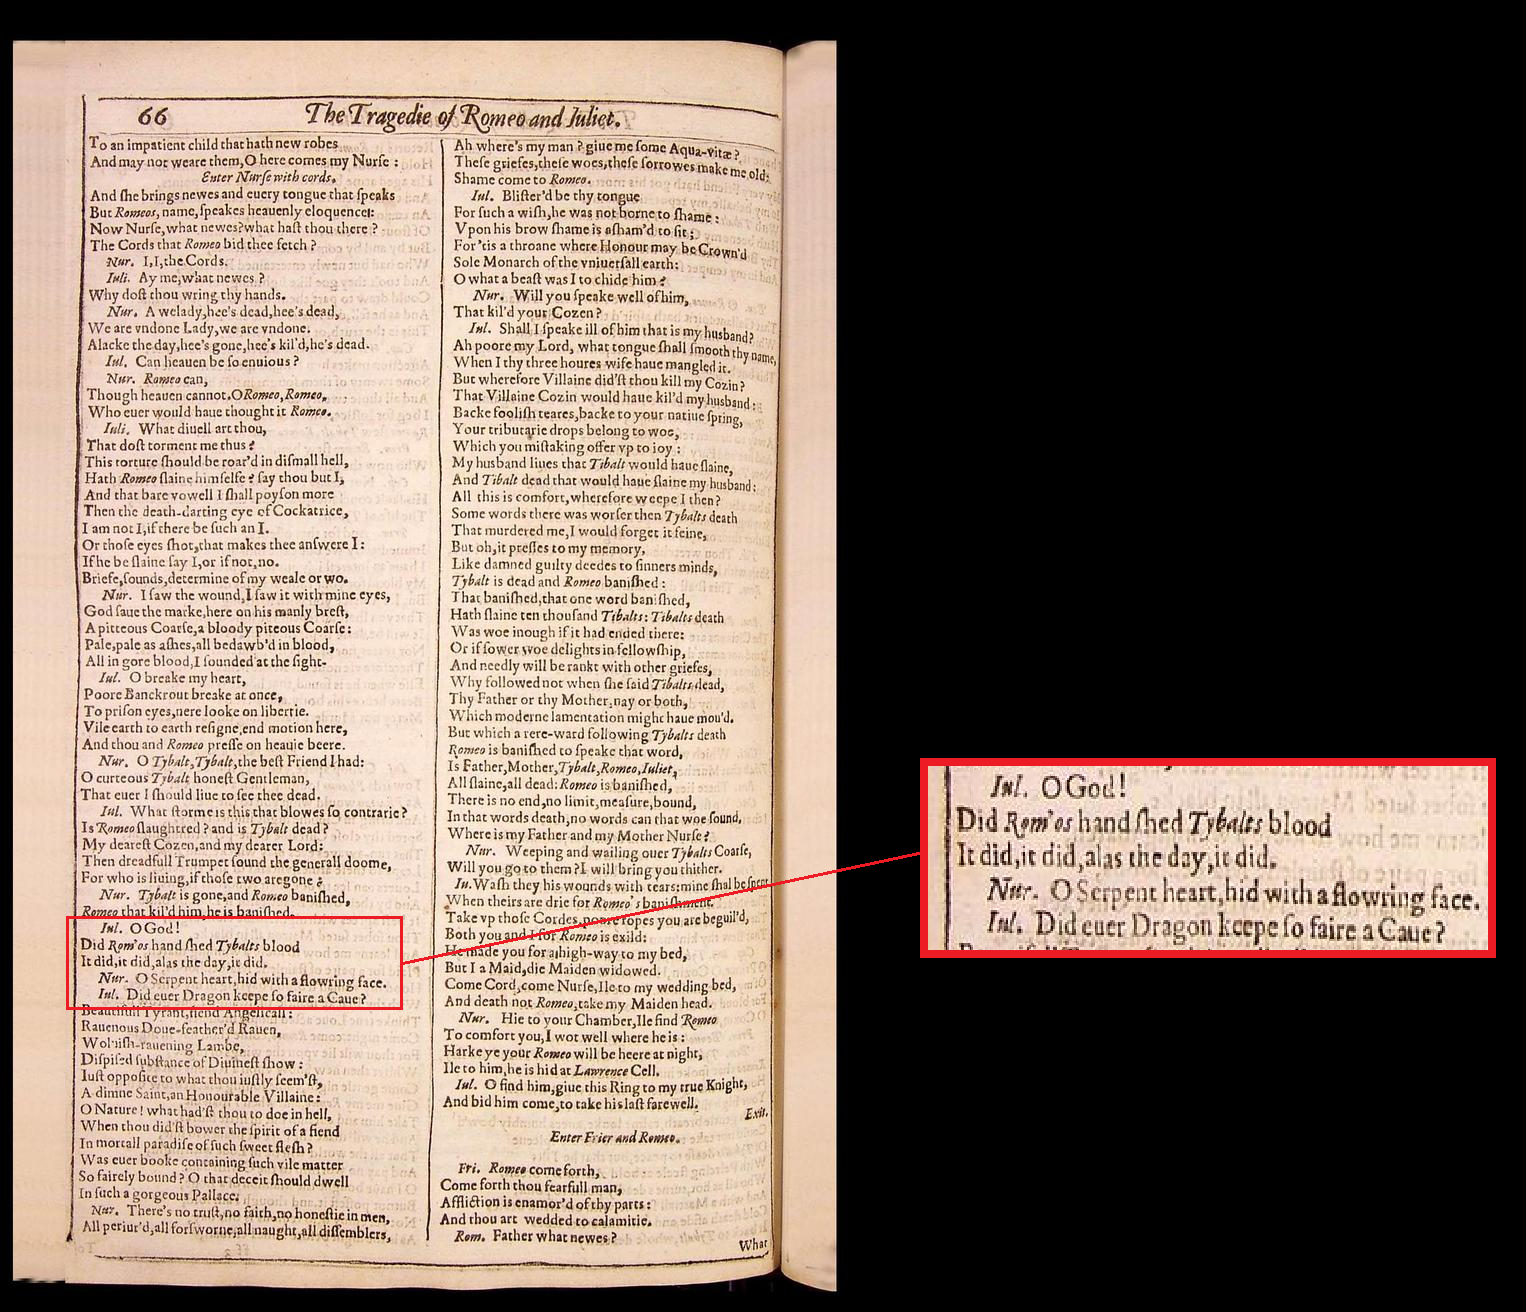

In [48]:
Image(filename='firstfolio_draft.png', width=1000, height=1100)

In [49]:
baseurl = "https://en.wiktionary.org/wiki/"

summary = []
for w in olddf.sort_values(by='OldF', ascending=False)[0:100].Word:
    req = ''
    try:
        req = urllib2.urlopen(baseurl+w).read().decode('utf-8')
    except urllib2.HTTPError, error:
        req = 'No entry'
    summary.append((w, req))

In [50]:
html_summary = '<hr style="height:10px;border:none;color:#333;background-color:#333;" />'
for w in summary:
    wiki = ''
    word = w[0]
    print word
    if w[1] == 'No entry':
        wiki = '<i>No entry</i>'
    elif '<h2><span class="mw-headline" id="English">' not in w[1]:
        wiki = '<i>No English entry</i>'
    elif '<hr />' not in w[1]:
        ind = w[1].index('<h2><span class="mw-headline" id="English">')
        wiki = w[1][ind:]
        wiki = wiki[0:wiki.index('</div>')+6]
    else:
        ind = w[1].index('<h2><span class="mw-headline" id="English">')
        wiki = w[1][ind:]
        wiki = wiki[0:wiki.index('<hr />')]
    
    html_summary += ('<h1 style="color:#069">%s</h1><h2 style="color:#954">Wiki:</h2>' % w[0])
    html_summary += wiki
    
    html_summary += '<br/> <h2 style="color:#954">Usage in First Folio:</h2>'
    
    examples = []
    for sent in sents:
        if ' '+word+' ' in sent or ' '+word+'.' in sent or ' '+word+',' in sent:
            examples.append(sent)
            if len(examples) == 5:
                break
    if len(examples) < 5:
        word = word[0].upper() + word[1:]
        for sent in sents:
            if ' '+word+' ' in sent or ' '+word+'.' in sent or ' '+word+',' in sent:
                examples.append(sent)
                if len(examples) > 5:
                    break
    html_exs = ''
    for ex in examples:
        html_exs += '<li>%s</li>' % ex.replace(word, '<b>'+word+'</b>')
    word = word[0].lower() + word[1:]
    html_exs = html_exs.replace(word, '<b>'+word+'</b>')
    
    html_summary += html_exs
    
    html_summary += '<hr style="height:10px;border:none;color:#333;background-color:#333;" />'
    
HTML(html_summary)

loue
haue
iul
nur
ile
vp
iuliet
giue
faire
vpon
selfe
fri.
frier
vs
looke
heauen
againe
backe
speake
deare
mountague
heare
thinke
liue
heere
graue
teares
neuer
houre
shee
poore
countie
villaine
owne
slaine
helpe
keepe
goe
mo
oh
newes
loues
ser
sonne
fri
vse
benuolio
sleepe
tib
ioy
poyson
doe
downe
leaue
prin
talke
marrie
feare
soule
beare
euer
turne
euery
iuli
euen
liues
alacke
yeares
kisse
cozin
beene
hee
goodnight
soone
sweete
eares
mu
blacke
himselfe
ore
griefe
siluer
vnto
musicke
dreame
moue
onely
meanes
ro
iohn
meane
nere
answere
lawrence
weepe
la
tibalt
weele
sam
shew


In [51]:
file = open("summary.html","w")
file.write(html_summary.encode('utf-8'))
file.close()

In [52]:
N = 3000
xxx = range(1, N+1)
curve_fit(zipf, xxx, f_lfreq[0:N])

(array([ 0.6061035]), array([[  8.63720812e-06]]))

In [53]:
p = figure(title='Romeo and Juliet Words Count')
p.circle(range(1, len(lfreq)+1)[0:N], f_lfreq[0:N], source = source)
p.line(xxx[0:N], zipf(xxx, 0.6)[0:N], color='red')
show(p)

In [54]:
rarews = []
for index, row in olddf.sort_values(by='OldF', ascending=False)[100:].iterrows():
    if row.OldF > 2:
        word = row.Word
        req = ''
        try:
            req = urllib2.urlopen(baseurl+word).read().decode('utf-8')
        except urllib2.HTTPError:
            print index, word, row.OldF
            rarews.append((word, row.OldF))
        except urllib2.URLError:
            print word, 'ERROR'

2732 louing 8
3945 wofull 8
3731 inough 8
5090 cloudes 8
3567 mountagues 7
4885 lookes 7
2185 shewes 6
1947 larke 6
3411 pa. 6
584 enuious 6
4291 vnlesse 6
3915 fourteene 6
3618 cheekes 6
3939 fiue 6
1682 doome 6
747 knocke 5
5359 romeos 5
3545 sighes 5
60 liuing 5
4601 ioyfull 5
4940 musitions 5
4915 speakes 5
2151 ouer 5
4303 vntimely 5
4830 giues 5
763 appothecarie 4
2328 heele 4
3725 seruing 4
1804 adue 4
2667 thumbe 4
3093 tibalts 4
3578 griefes 4
2871 coniure 4
2864 iuliets 4
3591 steele 4
732 hoare 4
5345 bloud 4
486 vncle 4
4515 wombe 4
4522 saue 4
4590 gyrle 4
4840 youle 4
344 bridegroome 4
3983 iealous 4
4735 forsworne 4
3718 dispaire 3
426 vnaccustom 3
2252 remoue 3
2216 too't 3
3117 licke 3
3145 blowes 3
998 couer 3
520 sadnesse 3
464 craues 3
393 assoone 3
1325 iest 3
2573 anothers 3
1749 likenesse 3
2421 wher 3
4603 bridall 3
2402 youthfull 3
20 emptie 3
4903 solemnitie 3
2705 ieast 3
4948 rowse 3
5160 proofe 3
4023 wooe 3
633 keepes 3
3350 cozins 3
934 day-light 3
5195 h

In [55]:
len(rarews)

72

In [56]:
html_summary = '<hr style="height:10px;border:none;color:#333;background-color:#333;" />'
for w in rarews[0:-1]:
    word = w[0]
    html_summary += ('<h1 style="color:#069">%s</h1>' % word)   
    
    html_summary += '<br/> <h2 style="color:#954">Variants:</h2>'
    var = word
    if word[0] == 'i':
        var = 'j' + word[1:]
    if word[-1] == 'e':
        var = var[0:-1]
    if 'u' in word:
        var  = var.replace('u', 'v')
    html_summary += ('<h1 style="color:#069">%s</h1>' % var)
    
    html_summary += '<br/> <h2 style="color:#954">Usage in First Folio:</h2>'
    examples = []
    for sent in sents:
        if ' '+word+' ' in sent or ' '+word+'.' in sent or ' '+word+',' in sent:
            examples.append(sent)
            if len(examples) == 3:
                break
    if len(examples) < 3:
        word = word[0].upper() + word[1:]
        for sent in sents:
            if ' '+word+' ' in sent or ' '+word+'.' in sent or ' '+word+',' in sent:
                examples.append(sent)
                if len(examples) > 3:
                    break
    html_exs = ''
    for ex in examples:
        html_exs += '<li>%s</li>' % ex.replace(word, '<b>'+word+'</b>')
    word = word[0].lower() + word[1:]
    html_exs = html_exs.replace(word, '<b>'+word+'</b>')
    
    html_summary += html_exs
    
    html_summary += '<hr style="height:10px;border:none;color:#333;background-color:#333;" />'

HTML(html_summary.decode('utf-8'))

#Summary:
###Language changes

*  v ↔ u
    (vs → us, vnaccustom → unaccustom, graue → grave, loue → love, fiue → five, vncle → uncle)

* e → a
    (frier → friar, heere → hear)

* i → j
    (Iuliet → Juliet, Iohn → John, ioy → joy, coniure → conjure)
    
* -e
    (alacke → alack, eares → ears, blacke → black, selfe → self, musicke → music, sonne → son, dogge → dog, sixe → six)
    
* +v
    (nere → never, ore → over)
    
* y → i
    (gyrle → girl, poyson → poison)

Other: mo → more, wher → where, marrie → marry, onely → only, shew → show, weele → we will